# [IAPR][iapr]: Project


**Group ID:** xx

**Author 1 (sciper):** Student Name 1 (xxxxx)  
**Author 2 (sciper):** Student Name 2 (xxxxx)   
**Author 3 (sciper):** Student Name 3 (xxxxx)   

**Release date:** 07.05.2021  
**Due date:** 03.06.2021 (23h59)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class as well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

---
## 0. Introduction

An anonymous researcher that we will name Lann Yecun is convinced that the MNIST dataset still has great potential. He decides to create a playing card game based on MNIST digits and different figures. The game uses a standard 52 card deck which is composed of four French suits/colours: clubs (&#9827;), diamonds (&#9830;), hearts (&#9829;) and spades (&#9824;). Each suit includes 10 digit cards (from 0 to 9) and 3 figures (Jack-J, Queen-Q, and King-K). Here is an example of the 13 spade cards with their name.


<img src="media/example_cards.png">


We can find the same arrangement of cards for the clubs, diamonds, and hearts. 


## 1. Rules


### 1.1 Standard

The rules are based on the simple battle card game. The goal of the game is to win as many points as possible. Each turn, the 4 players play a card in front of them. As displayed in the example below. The rules are the following:

- The cards are ranked in the following order : **0 < 1 < 2 < 3 < 4 < 5 < 6 < 7 < 8 < 9 < J < Q < K**.
- The player with the highest-ranked card wins the round and obtains **1 point**. 
- If the highest-ranked card is the same for multiple players we call it a draw and all winners get **1 points**. 
- In this configuration, we **do not** take into account the suits. The game only rely on the card ranks. 
- The game lasts 13 rounds. After the last round, the winner is the player that has the largest number of points. 
- In the example below Player 1 wins the round with his Queen ( 0 < 8 < J < **Q**).

If two or more players have the same number of points they share the victory.

### 1.2 Advanced

The advanced rules take into account the suits. 

- At the beginning of **each round** a random player is designated as the **dealer**. The dealer places a green token with the letter *D* next to him (player 1 in the example below).
- Only the cards that belong to the same suit as the one of the dealer are considered valid. In the example below, only Player 4 is competing with Player 1 as spade was selected by the dealer (e.i., Player 1). Player 2 and 3 are out for this round. Player 1 wins the round and **1 point** with the Queen ( 0&#9824; < **Q&#9824;**).
- There cannot be any draw between the players as they are not any card duplicates.
- We use the same system as the standard method to count the points.


<img src="media/example_round.jpg">


### 1.3 Notes

- The orientation of the card is linked to the position of the player around the table. For instance, to read the card of the 3rd player you will have to rotate it by 180°.
- The **digits** always **face** the players around the table. The figures can have random orientations.
- Player 1 **always** seats south of the table. The players are **always** ordered counter-clockwise as in the example. 
- The dealers can change between the rounds and games.
- Some cards **might** apear multiple times per game.
- Pictures are always taken from rougthly the same altitude.
- The digits from the training set **would not** be the same as the one of the testing set.

---
## 2. Data

You will be given the images of 7 games that were played ([download link](https://drive.google.com/drive/folders/1fEy27wnJsUJPRsEEomzoAtP56s-7HFtk?usp=sharing)). The data are composed of:
   - 7 folder named after the games (game1 to game7).
   - Each game includes 13 ordered images (1st to 13th round).
   - Each game includes a csv file with the ground truth of the game. The first row list the players (P1 to P4) as well as the dealer (D). The following rows represent the rounds (1 to 13). We represent the card played with 2 character as $AB$ where $A \in [0-9, J, Q, K]$ is the rank of the card and $B \in [C, D, H, S]$ is the suit. For example, QS means "(Q)ueen of (S)pade" and 0D means "(0) of (D)iamond". The dealer is represented by the ID of the player (e.g. P1 -> 1).
   
You are free to use external datasets such as the original MNIST train set that you used in lab 3.

---
## 3. Your Tasks

Your task is to ready yourself for the final evaluation. The day of the exam we will give you a new folder with a new game. ! The digits on the cards **differ** from the one of the traning set. When given a new data folder with 13 images your should be able to:

**Task 0**
   - Plot an overlay for each round image that shows your detections and classification. You can for example plot bounding boxes around the cards/dealer token and add a text overlay with the name of the classes.

**Task 1**
   - (a) Predict the **rank** of the card played by each player at each round (Standard rules).
   - (b) Predict the **number of points** of each player according to **Standard** rules
 
**Task 2**
   - (a) Detect which player is the selected **dealer** for each round.
   - (b) Predict the **rank** and the **suit** of the card played by each player at each round (Advanced rules).
   - (c) Predict the **number of points** of each player according to **Advanced** rules

---

**Before the exam (until 03.06.21 at 23h59)**
   - Create a zipped folder named **group_xx.zip** that you uplaod on moodel (xx being your group number).
   - Include a **runnable** code (Jupyter Notebook and external files) and your presentation in the zip folder.
   
**The day of the exam (04.06.21)**
   - You will be given a **new folder** with 13 images (rounds) and but **no ground truth** (csv file).
   - We will ask you to run your pipeline in **realtime** and to send us your prediction of task 1 and 2 that you obtain with the function **print_results**. 
   - On our side we will compute the perfomance of your classification algorithm. 
   - To evaluate your method we will use the **evaluate_game** function presented below. To understant how the provided functions work please read the documentation of the functions in **utils.py**.
   - **Please make sure your function returns the proper data format to avoid points penalty the day of the exam**. 

---
### 3.1 Example Final results

Example of output you **should** provide the day of the final exam.

In [1]:
from utils import print_results
import numpy as np

# Creates dummy predictions (toy exmaple)
pred_rank = np.array(["0D"]*4*13).reshape((13, 4)) # Everyone played the "0 of spade".
pred_dealer = [1]*13                # List of players selected as dealer for each round
pred_pts_stand = [0,0,0,13]         # Player 4 won 13 points with standard rules.
pred_pts_advan = [0,0,8,7]          # Player 3 and 4 won 8 and 7 points with adv, rules respectively.

print_results(
    rank_colour=pred_rank, 
    dealer=pred_dealer, 
    pts_standard=pred_pts_stand,
    pts_advanced=pred_pts_advan,
)

The cards played were:
[
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
]
Players designated as dealer: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Players points (standard): [0, 0, 0, 13]
Players points (advanced): [0, 0, 8, 7]


---
### 3.2 Example Accuracy

Example of code you can use to validate the performance of your model. Be careful the day of the exam you will not have access to the ground truth of the predictions.

In [2]:
from utils import evaluate_game
import pandas as pd
#! You will need pandas libary to run the example. Please install the package using pip or conda commands !

# Load ground truth from game 1
cgt = pd.read_csv('train_games/game1/game1.csv', index_col=0)
cgt_rank = cgt[['P1', 'P2', 'P3', 'P4']].values

# Compute accuracy of prediction
acc_standard = evaluate_game(pred_rank, cgt_rank, mode_advanced=False)
acc_advanced = evaluate_game(pred_rank, cgt_rank, mode_advanced=True)
print("Your model accuracy is: Standard={:.3f}, Advanced={:.3f}".format(acc_standard, acc_advanced))

Your model accuracy is: Standard=0.077, Advanced=0.019


In [35]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2 as cv
import cv2
import numpy as np

import matplotlib.image as mpimg
import pandas as pd
from torchvision.models import resnet18
from torchvision.datasets import EMNIST
from torchvision import transforms
from torch import nn
from torch.utils.data import DataLoader
import torch
import torch.nn.functional as F
import xgboost
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import cross_val_score
from skimage.morphology import erosion, dilation, opening, closing
from skimage.measure import label, regionprops, regionprops_table
from skimage.morphology import remove_small_objects 
from skimage.morphology import (disk, square, diamond)
from tqdm import tqdm

## Loading game

In [36]:
def load(game ,path=False):
    num = list(range(1,14))
    names = [str(i)+'.jpg' for i in num]
    if path:
        ic = skimage.io.imread_collection([game+nm for nm in names])
    else:
        ic = skimage.io.imread_collection(["train_games/"+game+'/'+nm for nm in names])

    round_im = skimage.io.concatenate_images(ic)
    return round_im, names

In [37]:
g1_round_im , g1_round_num = load("game1")

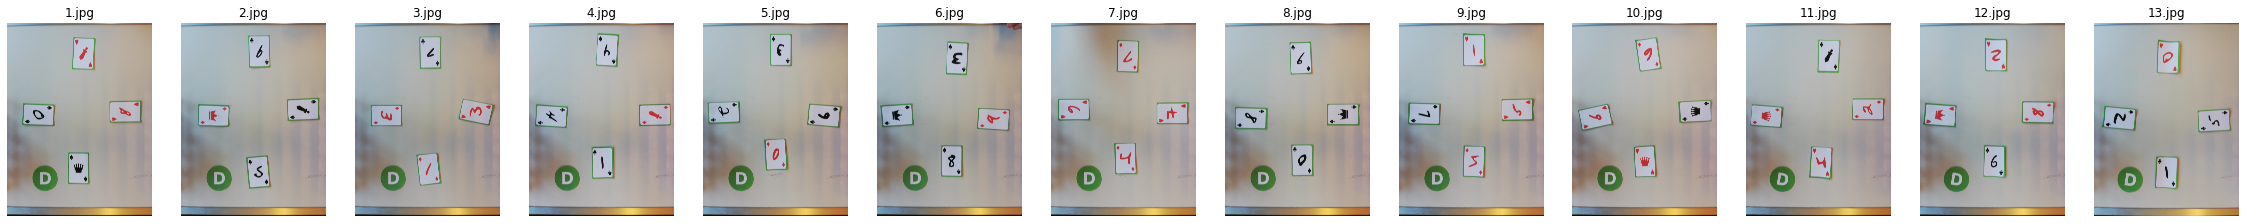

In [6]:
# Plot images
fig, axes = plt.subplots(1, len(g1_round_im), figsize=(40, 15))
for ax, im, nm in zip(axes, g1_round_im, g1_round_num):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

# Segmentation

In [7]:
def plot_contours(img, contours):    
    fig, axes = plt.subplots(1, len(contours), figsize=(30,40))
    for idx in range(len(contours)):
        mask = np.zeros_like(img) # Create mask where white is what we want, black otherwise
        cv2.drawContours(mask, contours, idx, 255, -1) # Draw filled contour in mask
        out = np.zeros_like(img) # Extract out the object and place into output image
        out[mask == 255] = img[mask == 255]

        # Now crop
        (y, x, z) = np.where(mask == 255)
        (topy, topx) = (np.min(y), np.min(x))
        (bottomy, bottomx) = (np.max(y), np.max(x))
        out = out[topy:bottomy+1, topx:bottomx+1, :]
        img_cropped = img[topy:bottomy+1, topx:bottomx+1, :]
        axes[idx].imshow(img_cropped)

def get_contours_box(contours):
    boxes = []
        
    for idx in range(len(contours)):
        c = contours[idx].reshape(-1, 2)
        # Now crop
        (x, y) = (c[:, 1], c[:, 0])
        (miny, minx) = (int(np.rint(np.min(y))), int(np.rint(np.min(x))))
        (maxy, maxx) = (int(np.rint(np.max(y))), int(np.rint(np.max(x))))
        boxes.append([miny, maxy, minx, maxx])
        
    return boxes

def filter_overlapping(contours, boxes):
    flags = [True] * len(contours)
    
    for i in range(len(contours)):
        
        if not flags[i]:
            continue
            
        curr_box = boxes[i]
        
        if ((curr_box[0] < 100) and (curr_box[2] < 500)) or ((curr_box[0] < 500) and (curr_box[2] > 4000)):
            flags[i] = False
            continue
        
        for j in range(i, len(contours)):
            
            new_box = boxes[j]
            
            enclosed = ((curr_box[0] < new_box[0]) &
                       (curr_box[1] > new_box[1]) &
                       (curr_box[2] < new_box[2]) &
                       (curr_box[3] > new_box[3]))
            
            if enclosed:
                flags[j] = False
                
    contours = [contours[i] for i in range(len(contours)) if flags[i]]
    boxes = [boxes[i] for i in range(len(contours)) if flags[i]]
    return contours, boxes

def plot_image(img, cmap='gray',):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img, cmap=cmap)
    plt.show()

In [8]:
def distance(p1,p2):
    result= ((((p2[0] - p1[0])**2) + ((p2[1]-p1[1])**2))**0.5)
    return result

In [9]:
def assign_cards_dealer(cards, dealer):
    '''
    returns :
        ordered cards [Player1_card, Player2_card, Player3_card, Player4_card]
            each PlayerX_card is a tuple with (((x_center,y_center),(width,height),angle_rot),card_contour)
        dealer_player = indx in [1,2,3,4] indicating the player
    '''
    card_centers = [(cv.minAreaRect(card),card) for card in cards]
    sorted_cards = sorted(card_centers)
    ordered = []
    if (sorted_cards[1][0][0][1]<sorted_cards[2][0][0][1]):
        ordered= [sorted_cards[2],sorted_cards[3],sorted_cards[1],sorted_cards[0]]
    else:
        ordered= [sorted_cards[1],sorted_cards[3],sorted_cards[2],sorted_cards[0]]

    dealer_rect = cv.minAreaRect(dealer)
    distances_to_dealer = [distance(dealer_rect[0],sorted_card[0][0]) for sorted_card in ordered]
    dealer_player = np.argmin(distances_to_dealer)+1
    return ordered,dealer_player, dealer_rect

In [10]:
def put_text(img,ordered,dealer_player,dealer_rect):
    # put dealer text (x_center - width/2 , y_center - height/2)
    dealer_text_org = (int(dealer_rect[0][0])-250 , int(dealer_rect[0][1]-dealer_rect[1][1]/2)-100)
    result = cv.putText(img.copy(), 'Dealer', dealer_text_org, cv.FONT_HERSHEY_SIMPLEX, 5, (0, 0, 0), thickness=7)
    
    # put player 1 text
    player1_text_org = (int(ordered[0][0][0][0]-ordered[0][0][1][1]/2)-50,int(ordered[0][0][0][1]+ordered[0][0][1][0]/2)+200)
    result = cv.putText(result, 'Player 1', player1_text_org, cv.FONT_HERSHEY_SIMPLEX, 5, (0, 0, 0), thickness=7)

    # put player 3 text
    player3_text_org = (int(ordered[2][0][0][0]-ordered[2][0][1][1]/2)-50,int(ordered[2][0][0][1]-ordered[2][0][1][0]/2)-50)
    result = cv.putText(result, 'Player 3', player3_text_org, cv.FONT_HERSHEY_SIMPLEX, 5, (0, 0, 0), thickness=7)
    
    # put player 2 text
    player2_text_org = (int(ordered[1][0][0][0]-ordered[1][0][1][1]/2)-50,int(ordered[1][0][0][1]+ordered[1][0][1][0]/2)+100)
    result = cv.putText(result, 'Player 2', player2_text_org, cv.FONT_HERSHEY_SIMPLEX, 5, (0, 0, 0), thickness=7)

    # put player 4 text
    player4_text_org = (int(ordered[3][0][0][0]-ordered[3][0][1][1]/2)+100,int(ordered[3][0][0][1]+ordered[3][0][1][0]/2)+200)
    result = cv.putText(result, 'Player 4', player4_text_org, cv.FONT_HERSHEY_SIMPLEX, 5, (0, 0, 0), thickness=7)
    
    return result

In [11]:
def preprocess_image(img):
    # remove unwanted borders
    crop = img[150:-270,30:-30,:]
    # convert to graylevel
    gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
    # apply adaptive thresholding (since parts of same images doesn't have same luminosity/contrast )
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 35, 5)
    # black background
    result = 255 - thresh
    return result , crop

def seg_pipe_final(img):
    drawn_contours = []
    kernel = np.ones((3,3),np.uint8)
    black_white_im, cropped_img = preprocess_image(img)
    opening = cv.morphologyEx(black_white_im, cv.MORPH_OPEN, kernel)
    closing = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)
    kernel2 = cv.getStructuringElement(cv.MORPH_RECT,(5,500))
    kernel3 = cv.getStructuringElement(cv.MORPH_RECT,(500,5))
    closing_edge_1 = cv.morphologyEx(closing[:, :5], cv.MORPH_CLOSE, kernel2)
    closing_edge_2 = cv.morphologyEx(closing[:, -5:], cv.MORPH_CLOSE, kernel2)
    closing_edge_3 = cv.morphologyEx(closing[:5,:], cv.MORPH_CLOSE, kernel3)
    closing_edge_4 = cv.morphologyEx(closing[-5:,:], cv.MORPH_CLOSE, kernel3)
    closing[:, :5] = closing_edge_1
    closing[:, -5:] = closing_edge_2
    closing[:5, :] = closing_edge_3
    closing[-5:, :] = closing_edge_4
    contours, _ = cv.findContours(closing, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    contours = sorted(contours, key=lambda contour: cv.contourArea(contour), reverse= True)
    boxes = get_contours_box(contours)
    contours, boxes = filter_overlapping(contours, boxes)
    contours = contours[:5]
    boxes = boxes[:5]
    
    def green_ratio(box):
        segment_cropped = cropped_img[box[2]:box[3]+1, box[0]:box[1]+1, :]
        r_med = np.median(segment_cropped[:, :, 0])
        g_med = np.median(segment_cropped[:, :, 1])
        b_med = np.median(segment_cropped[:, :, 2])
    
        return 2 * g_med / (r_med + b_med)

    medians = [green_ratio(box) for box in boxes]
    dealer_idx = np.argmax(medians)
    dealer_contour = contours.pop(dealer_idx)
    dealer_box = boxes.pop(dealer_idx)
    contours.append(dealer_contour)
    boxes.append(dealer_box)

    
    return cropped_img, contours, boxes
    
def plot_bounding_boxes(cropped_img,contours, boxes):
    im = cropped_img.copy()
    for c, b in zip(contours, boxes):
        x,y,w,h = b[0], b[2], b[1] - b[0], b[3] - b[2]
        cv.rectangle(im,(x,y),(x+w,y+h),(0,0,255),10)
        
    return im

In [12]:
def detect_red_or_black(img):
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    ## Gen lower mask (0-5) and upper mask (175-180) of RED
    mask1 = cv.inRange(img_hsv, (0,50,20), (5,255,255))
    mask2 = cv.inRange(img_hsv, (175,50,20), (180,255,255))

    ## Merge the mask and crop the red regions
    mask_red = cv.bitwise_or(mask1, mask2)
    
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)    
    ## Gen lower mask (0-5) and upper mask (175-180) of BLACK
    mask_black = cv.inRange(img_hsv, (0, 0, 0), (180, 255, 30))
    
    if mask_red.sum() > mask_black.sum():
#         img_hsv = cv.cvtColor(third_card, cv.COLOR_RGB2HSV)
#         ## Gen lower mask (0-5) and upper mask (175-180) of RED
#         mask1 = cv.inRange(img_hsv, (0,50,20), (5,255,255))
#         mask2 = cv.inRange(img_hsv, (125,50,20), (180,255,255))

#         ## Merge the mask and crop the red regions
#         mask_red = cv.bitwise_or(mask1, mask2)
        return mask_red, 'red'
    
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)    
    ## Gen lower mask (0-5) and upper mask (175-180) of BLACK
    mask_black = cv.inRange(img_hsv, (0, 0, 0), (180, 255, 80))
    
    return mask_black, 'black'

## Plot overlay game segmentation and Extract cards number and suite :

In [13]:
def extract_cards_suites_and_plot_overlay_rounds(game,show=False):
    ## to store result: 
    data_df = pd.DataFrame(columns=['game', 'P1_suite','P1_number','P1_color','P2_suite','P2_number','P2_color',
                           'P3_suite','P3_number','P3_color','P4_suite','P4_number','P4_color','D'], dtype=object)
    g_round_im , g_round_num = load(game)
    print(game)
    for img in g_round_im:
        
        # segmentation
        cropped_img, contours, boxes = seg_pipe_final(img)
        cards = contours[:4]
        dealer = contours[4]
        
        # plot overlay
        bounded = plot_bounding_boxes(cropped_img,contours, boxes)
        ordered,dealer_player, dealer_rect = assign_cards_dealer(cards, dealer)
        result = put_text(bounded,ordered,dealer_player,dealer_rect)
        if show:
            plot_image(result)
            plt.show()
        
        #extract cards and suites
        ordered_contours = [entry[1] for entry in ordered]
        ordered_boxes = get_contours_box(ordered_contours)
        first_card = cropped_img[ordered_boxes[0][2]:ordered_boxes[0][3],
                                 ordered_boxes[0][0]:ordered_boxes[0][1], :]
        second_card = cv.rotate(cropped_img[ordered_boxes[1][2]:ordered_boxes[1][3],
                                  ordered_boxes[1][0]:ordered_boxes[1][1], :],
                                cv.ROTATE_90_CLOCKWISE)
        third_card = cv.rotate(cropped_img[ordered_boxes[2][2]:ordered_boxes[2][3],
                                 ordered_boxes[2][0]:ordered_boxes[2][1], :],
                               cv.ROTATE_180)
        fourth_card = cv.rotate(cropped_img[ordered_boxes[3][2]:ordered_boxes[3][3],
                                  ordered_boxes[3][0]:ordered_boxes[3][1], :],
                                cv.ROTATE_90_COUNTERCLOCKWISE)
        

        first_mask, first_color = detect_red_or_black(first_card)
        second_mask, second_color = detect_red_or_black(second_card)
        third_mask, third_color = detect_red_or_black(third_card)
        fourth_mask, fourth_color = detect_red_or_black(fourth_card)
        
        first_suite,first_number = first_mask.copy()[:250,:300],first_mask.copy()[200:570,120:420]
        second_suite,second_number = second_mask.copy()[:250,:300],second_mask.copy()[200:570,120:420]
        third_suite,third_number = third_mask.copy()[:250,:300],third_mask.copy()[200:570,120:420]
        fourth_suite,fourth_number = fourth_mask.copy()[:250,:300],fourth_mask.copy()[200:570,120:420]
        
        row = {'game':game, 'P1_suite':first_suite,'P1_number':first_number,'P1_color':first_color,
               'P2_suite':second_suite,'P2_number':second_number,'P2_color':second_color,
               'P3_suite':third_suite,'P3_number':third_number,'P3_color':third_color,
               'P4_suite':fourth_suite,'P4_number':fourth_number,'P4_color':fourth_color,'D':dealer_player}
        data_df=data_df.append(row,ignore_index=True)
    return data_df

In [14]:
full_data_df = pd.DataFrame(columns=['game', 'P1_suite','P1_number','P1_color','P2_suite','P2_number','P2_color',
                           'P3_suite','P3_number','P3_color','P4_suite','P4_number','P4_color','D'], dtype=object)
for i in range(1, 8):
    game = f"game{i}"
    game_data_df = extract_cards_suites_and_plot_overlay_rounds(game)
    full_data_df=full_data_df.append(game_data_df,ignore_index=True)

game1
game2
game3
game4
game5
game6
game7


## Classifying suits

In [15]:
def histogram_equalization(img):
    img = cv.cvtColor(img, cv.COLOR_RGB2BGR)

    img_yuv = cv.cvtColor(img, cv.COLOR_BGR2YUV)

    # equalize the histogram of the Y channel
    img_yuv[:,:,0] = cv.equalizeHist(img_yuv[:,:,0])

    # convert the YUV image back to RGB format
    img_output = cv.cvtColor(img_yuv, cv.COLOR_YUV2RGB)
    
    return img_output

def preprocess_for_segmentation(img, kernel_size=(55,55)):
    gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    blur = cv.GaussianBlur(gray,kernel_size,10)
    return blur

def perform_segmentation(preprocessed_img):
    flag, thresh = cv.threshold(preprocessed_img, 120, 255, cv.THRESH_BINARY)
    contours, hierarchy = cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv.contourArea,reverse=True)
    return contours, hierarchy

def classify_suite(color,suite):
    img_eq = histogram_equalization(suite)
    processed_im = preprocess_for_segmentation(img_eq, kernel_size=(1,1))
    contours, _  = perform_segmentation(processed_im)
    area = cv.contourArea(contours[0])
    if color=='black':
        if area>=4900 : suite='S'
        else: suite='C'
    else:
        if area>=4065: suite='H'
        else: suite='D'
    return suite

def output_suites(dataframe):
    df=dataframe.copy()
    df["suite_p1"] = df.apply(lambda row: classify_suite(row.P1_color,row.P1_suite) ,axis=1)
    df["suite_p2"] = df.apply(lambda row: classify_suite(row.P2_color,row.P2_suite) ,axis=1)
    df["suite_p3"] = df.apply(lambda row: classify_suite(row.P3_color,row.P3_suite) ,axis=1)
    df["suite_p4"] = df.apply(lambda row: classify_suite(row.P4_color,row.P4_suite) ,axis=1)
    return df

In [16]:
full_data_df = output_suites(full_data_df)
full_data_df[["suite_p1","suite_p2","suite_p3","suite_p4"]]

suite_p1 suite_p2 suite_p3 suite_p4
0         S        H        H        S
1         S        S        C        D
2         D        H        C        D
3         S        D        S        C
4         D        S        C        C
..      ...      ...      ...      ...
86        H        H        S        S
87        S        H        S        S
88        H        H        H        H
89        C        C        C        C
90        H        C        H        H

[91 rows x 4 columns]

## Classifying cards

#### load ground truth

In [17]:
def load_game_csv(game):
    path = f'train_games\\{game}\\{game}.csv'
    cgt = pd.read_csv(path, index_col = 0)
    cgt_rank = cgt[['P1', 'P2', 'P3', 'P4']].values
    dealer = cgt[['D']].values
    return ground_truth

def create_needed_df(game):
    grt=load_game_csv(game)
    df = pd.DataFrame({'P1_suite':[elem[1] for elem in grt.P1.values],
                   'P1_number':[elem[0] for elem in grt.P1.values],
                   'P2_suite':[elem[1] for elem in grt.P2.values],
                   'P2_number':[elem[0] for elem in grt.P2.values],
                   'P3_suite':[elem[1] for elem in grt.P3.values],
                   'P3_number':[elem[0] for elem in grt.P3.values],
                   'P4_suite':[elem[1] for elem in grt.P4.values],
                   'P4_number':[elem[0] for elem in grt.P4.values],
                   'D':grt.D.values})
    df['game']=game
    return df

dataframes = []
for i in range(1, 8):
    game = f"game{i}"
    df = create_needed_df(game)
    dataframes.append(df)
grt_df = pd.concat(dataframes,ignore_index=True)

In [18]:
cards_data = full_data_df[['P1_number', 'P2_number', 'P3_number', 'P4_number']].copy()
ground_data= grt_df[['P1_number', 'P2_number', 'P3_number', 'P4_number']].copy()

#### model1

In [19]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

model1 = Net()
model1.load_state_dict(torch.load('data/model.pth'))
model1.eval()

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

In [20]:
classes_map = {'0':0, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, 'J':10, 'K':11, 'Q':12}

#### freeman code

In [21]:
def calculate_area(chain):
    area = 0
    x = 0
    y = 0
    x_coord = [None]*len(chain)
    y_coord = [None]*len(chain)
    
    for i in range(len(chain)): # Transforming the chain code into x and y coordinates to compute the area
        if chain[i] == 0:
            x -= 1
            y += 1
        elif chain[i] == 1:
            y += 1
        elif chain[i] == 2:
            x += 1
            y += 1
        elif chain[i] == 3:
            x += 1
        elif chain[i] == 4:
            x += 1
            y -= 1
        elif chain[i] == 5:
            y -= 1
        elif chain[i] == 6:
            x -= 1
            y -= 1
        elif chain[i] == 7:
            x -= 1
        else:
            x = 1000 # Big value to clearly indicate if an error occurs
            y = 1000
        x_coord[i] = x
        y_coord[i] = y
        
    a = 0    
    for j in range(len(chain)-1): # Calculation of area contributed by consecutive pixels.
        a += x_coord[j]*y_coord[j+1] - x_coord[j+1]*y_coord[j]
    a += x_coord[len(chain)-1]*y_coord[0] - x_coord[0]*y_coord[len(chain)-1]
    
    area = abs(a)/2
    
    return area

In [22]:
def get_chain_code(image):
    feat_vect1 = []
    feat_vect2 = []
    feat_vect3 = []
    feat_vect4 = []
    chain_area = 0
    # Erosion to get rid of small smudges off to the sides.
    erosion_number = erosion(image, selem=square(1), out=None)>0
    # Clean the images by removing image regions that are smaller than 30 pixels
    cleaned_number = remove_small_objects(erosion_number, min_size=30, connectivity=1, in_place=False)
    # Dilate the image around a square with side 1
    dilation_number = dilation(cleaned_number, selem=square(1), out=None)

    img = 255*dilation_number # Dilation step returns True/False values: have to change it back to 0 to 255
    
    start_point = (0,0)
    ## Discover the first point 
    for i, row in enumerate(img):
        for j, value in enumerate(row):
            if value == 255:
                start_point = (i, j)
                break
        else:
            continue
        break

    directions = [ 0,  1,  2,
                   7,      3,
                   6,  5,  4]
    dir2idx = dict(zip(directions, range(len(directions))))

    change_j =   [-1,  0,  1, # x or columns
                  -1,      1,
                  -1,  0,  1]

    change_i =   [-1, -1, -1, # y or rows
                   0,      0,
                   1,  1,  1]

    border = []
    chain = []
    curr_point = start_point
    for direction in directions:
        idx = dir2idx[direction]
        new_point = (start_point[0]+change_i[idx], start_point[1]+change_j[idx])
        if img[new_point] != 0:
            border.append(new_point)
            chain.append(direction)
            curr_point = new_point
            break

    count = 0
    while curr_point != start_point:
        #figure direction to start search
        b_direction = (direction + 5) % 8 
        dirs_1 = range(b_direction, 8)
        dirs_2 = range(0, b_direction)
        dirs = []
        dirs.extend(dirs_1)
        dirs.extend(dirs_2)
        for direction in dirs:
            idx = dir2idx[direction]
            new_point = (curr_point[0]+change_i[idx], curr_point[1]+change_j[idx])
            if img[new_point] != 0: # if is ROI
                border.append(new_point)
                chain.append(direction)
                curr_point = new_point
                break
        if count == 15000: break
        count += 1

    chain_area = calculate_area(chain)
    
    d0=0
    d1=0
    d2=0
    d3=0
    d4=0
    d5=0
    d6=0
    d7=0
    
    for m in range(len(chain)): # Determines quantity of each direction
        if chain[m] == 0:
            d0 += 1
        elif chain[m] == 1:
            d1 += 1
        elif chain[m] == 2:
            d2 += 1
        elif chain[m] == 3:
            d3 += 1
        elif chain[m] == 4:
            d4 += 1
        elif chain[m] == 5:
            d5 += 1
        elif chain[m] == 6:
            d6 += 1
        elif chain[m] == 7:
            d7 += 1
        else:
            break
            
    directions_count = [d0,d1,d2,d3,d4,d5,d6,d7]
    
    # The deviation gives a quantity to how much the contours makes turns, i.e. a contour with a lot of curves
    # will have a big number, and contours like the number 1, will have smaller numbers.
    deviation = 0
    for i in range(len(chain)-1):
        deviation = deviation + abs(chain[i]-chain[i+1])
      
    return count, border, directions_count, chain_area, deviation

In [23]:
def train_model(cards_data,ground_data):
    
    ## prepare input MNIST
    X = []
    #y = []
    
    with torch.no_grad():
        for i in tqdm(range(91)):

            data_row = cards_data.iloc[i]
            #truth_row = ground_data.iloc[i]
            cards = ['P1_number', 'P2_number', 'P3_number', 'P4_number']

            for idx in cards:
                vector = cv.resize(data_row[idx], (28, 28))
                card = torch.tensor(vector, dtype=torch.float).unsqueeze(0).unsqueeze(0)
                #truth = truth_row[idx]    
                out = model1(card)
                X.append(out.numpy().reshape(-1))
                #y.append(classes_map[truth])
    
    ## prepare input (freeman)
    X_chain = []
    y_chain = []
    for i in range(91):

        data_row = cards_data.iloc[i]
        truth_row = ground_data.iloc[i]
        cards = ['P1_number', 'P2_number', 'P3_number', 'P4_number']

        for index in cards:
            img = data_row[index]
            img = np.pad(img, ((1, 1), (1, 1)), 'constant', constant_values=((0, 0), (0, 0)))
            truth = truth_row[index]
            _, _, directions_count, area, indiv_deviation = get_chain_code(img)
            code_features = directions_count + [area] + [indiv_deviation]
            X_chain.append(code_features)
            y_chain.append(classes_map[truth])
            
    X_chain = np.array(X_chain)
    y_chain = np.array(y_chain)
    
    ## concatenate inputs and train XGBClassifier
    X_both = np.concatenate((X, X_chain), axis=1)
    model = xgboost.XGBClassifier()
    model = model.fit(X_both, y_chain)
    
    return model

In [24]:
model = train_model(cards_data,ground_data)

100%|█████████████████████████████████████████████████████████████████████████████████| 91/91 [00:00<00:00, 151.32it/s]
C:\Users\Bouhmid\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:50:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## test

game6


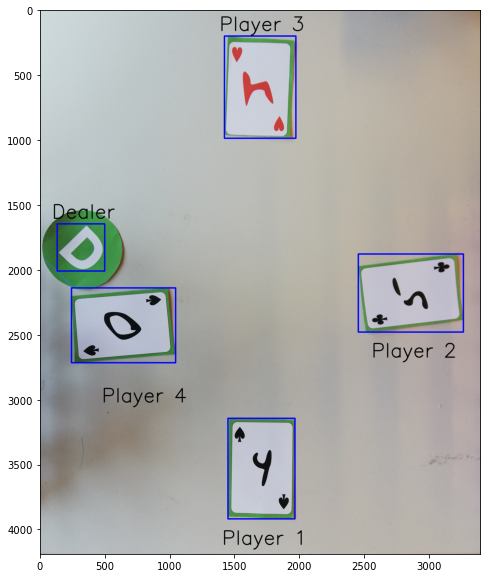

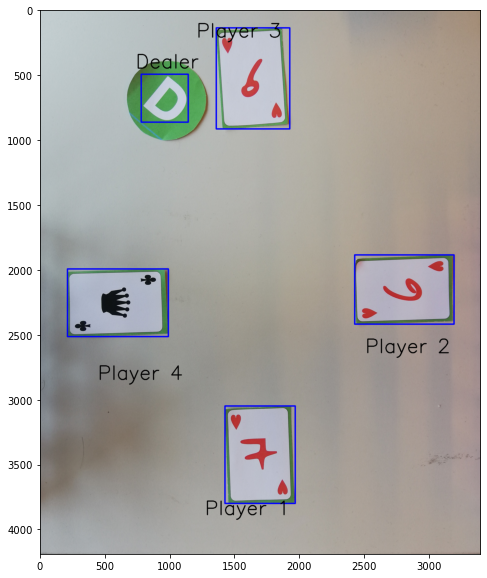

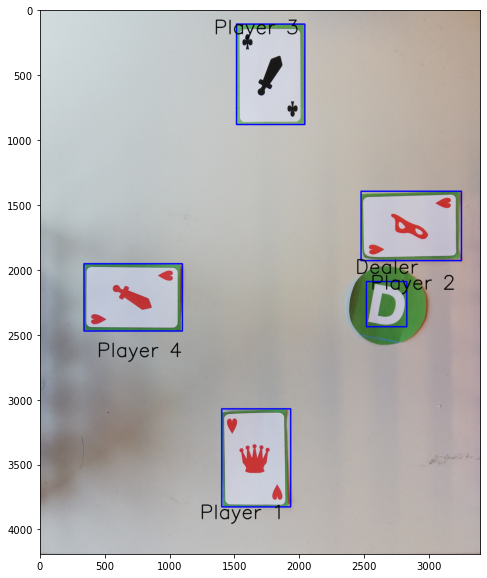

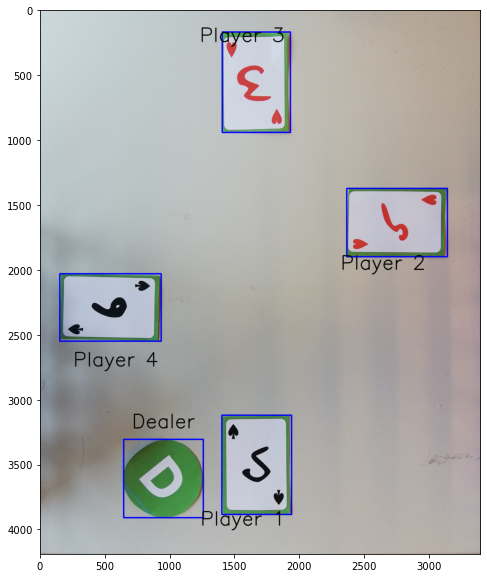

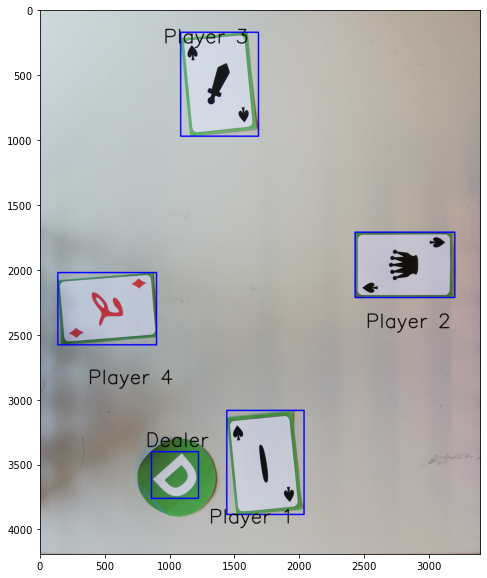

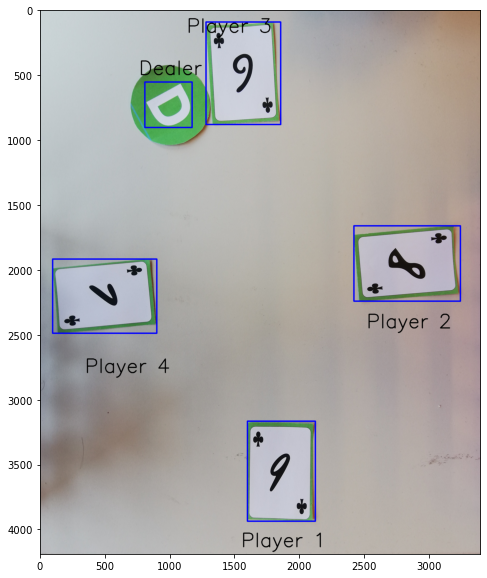

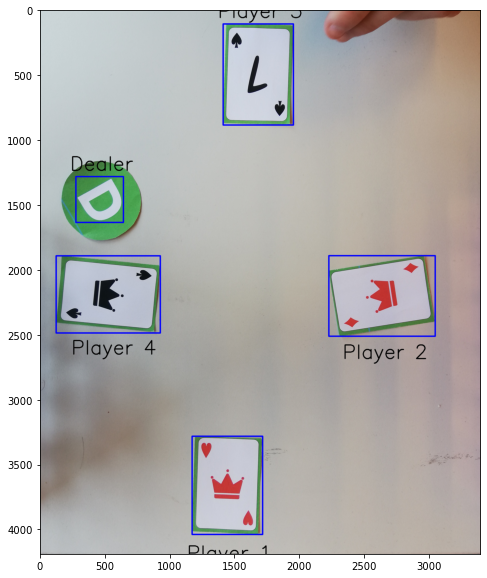

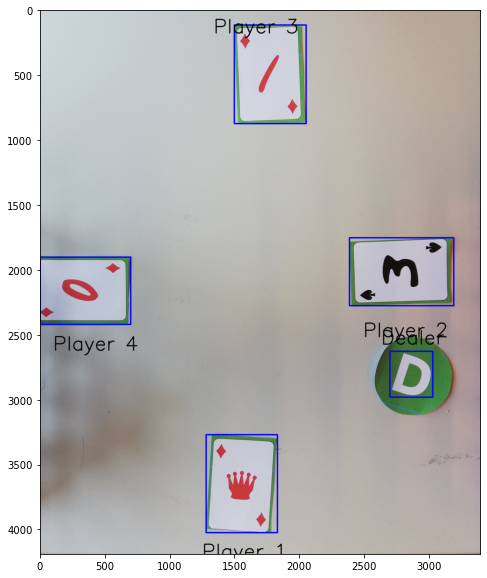

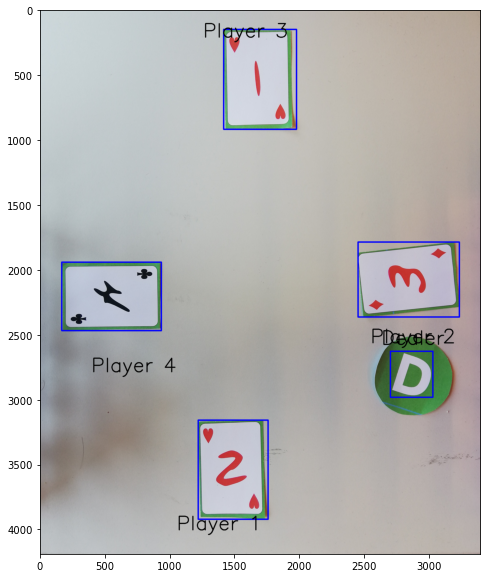

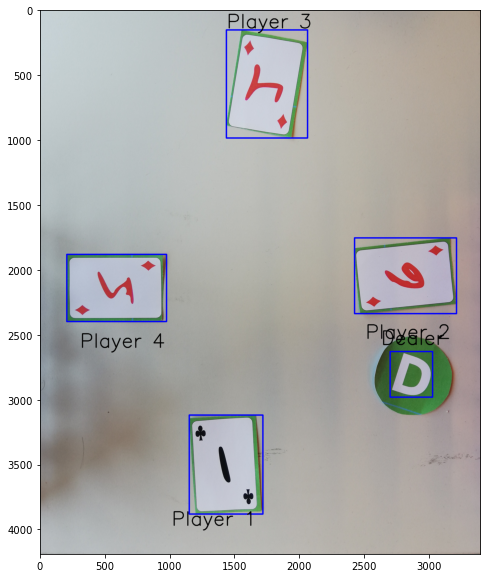

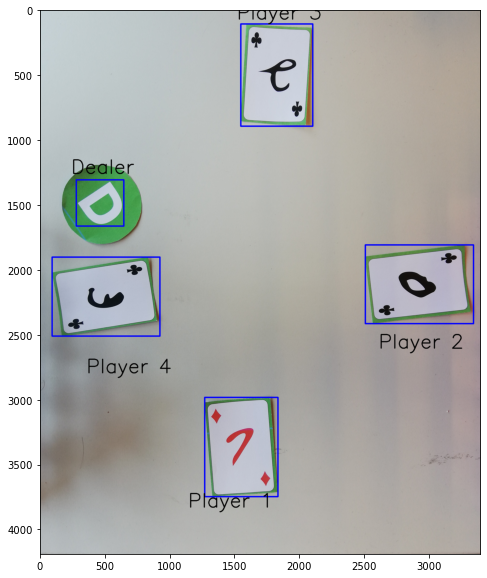

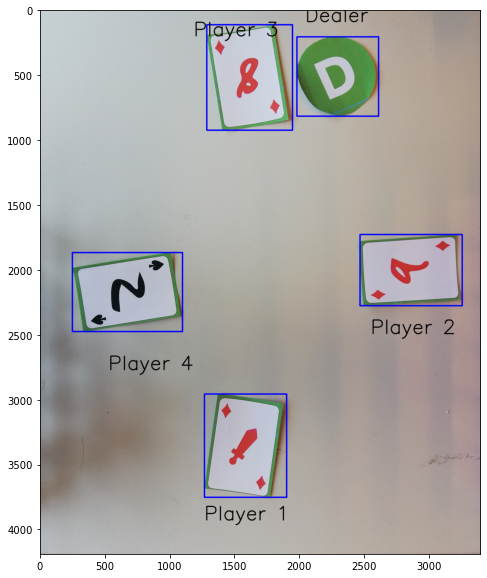

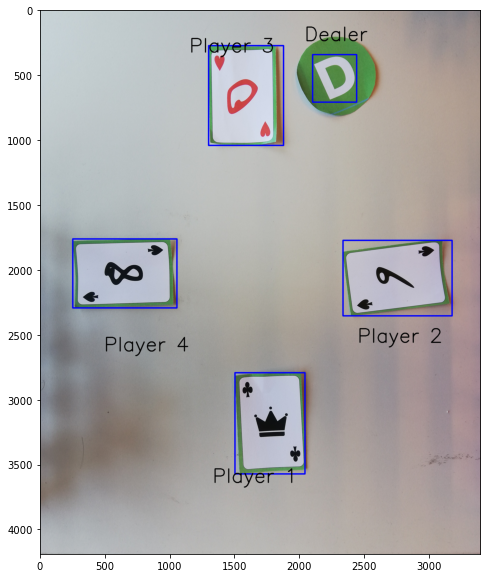

In [25]:
## load , extract cards and plot overlay rounds
game_df = extract_cards_suites_and_plot_overlay_rounds('game6',show=True)

## classify suites
game_df = output_suites(game_df)

In [26]:
def process_data_for_number_classification(game_df):
    X_test = []
    X_test_chain = []
    
    with torch.no_grad():
        for i in tqdm(range(len(game_df))):

            data_row = game_df.iloc[i]
            cards = ['P1_number', 'P2_number', 'P3_number', 'P4_number']

            for idx in cards:
                vector = cv.resize(data_row[idx], (28, 28))
                card = torch.tensor(vector, dtype=torch.float).unsqueeze(0).unsqueeze(0)
                out = model1(card)
                X_test.append(out.numpy().reshape(-1))
    
    for i in range(len(game_df)):

        data_row = cards_data.iloc[i]
        truth_row = ground_data.iloc[i]
        cards = ['P1_number', 'P2_number', 'P3_number', 'P4_number']

        for index in cards:
            img = data_row[index]
            img = np.pad(img, ((1, 1), (1, 1)), 'constant', constant_values=((0, 0), (0, 0)))
            _, _, directions_count, area, indiv_deviation = get_chain_code(img)
            code_features = directions_count + [area] + [indiv_deviation]
            X_test_chain.append(code_features)


    X_test_chain = np.array(X_test_chain)
    X_both = np.concatenate((X_test, X_test_chain), axis=1)
    return X_both

In [27]:
X = process_data_for_number_classification(game_df)

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 77.13it/s]


In [28]:
pred = model.predict(X)

In [29]:
map_numbers = {v: k for k, v in classes_map.items()}
pred = np.vectorize(map_numbers.get)(pred)

In [30]:
def assign_predicted_to_players(pred,dataframe):
    p1=[]
    p2=[]
    p3=[]
    p4=[]
    for i in range(int(len(pred)/4)):
        p1.append(pred[4*i])
        p2.append(pred[4*i+1])
        p3.append(pred[4*i+2])
        p4.append(pred[4*i+3])
    
    df=dataframe.copy()
    df["number_p1"] = p1
    df["number_p2"] = p2
    df["number_p3"] = p3
    df["number_p4"] = p4
    return df

In [31]:
game_df = assign_predicted_to_players(pred,game_df)

In [32]:
def output_result(dataframe):
    df = dataframe.copy()
    df["P1"] = df.apply(lambda row: row.number_p1 + row.suite_p1 ,axis=1)
    df["P2"] = df.apply(lambda row: row.number_p2 + row.suite_p2 ,axis=1)
    df["P3"] = df.apply(lambda row: row.number_p3 + row.suite_p3 ,axis=1)
    df["P4"] = df.apply(lambda row: row.number_p4 + row.suite_p4 ,axis=1)
    return df[["P1","P2","P3","P4","D"]].copy()

In [33]:
result = output_result(game_df)
result

P1  P2  P3  P4  D
0   4S  5C  4H  0S  4
1   7H  6H  9H  QC  3
2   QH  8H  JC  JH  2
3   5S  5H  3H  9S  1
4   9S  QS  JS  2D  1
5   9C  8C  6C  7C  3
6   KH  KD  7S  KS  4
7   QD  3S  1D  0D  2
8   2H  3D  1H  4C  2
9   1C  6D  4D  5D  2
10  7D  0C  2C  3C  4
11  JD  9D  8D  2S  3
12  KC  7S  0H  8S  3

In [34]:
print_results(
    rank_colour=result[["P1","P2","P3","P4"]].values, 
    dealer=np.ravel(result[['D']].values), 
    pts_standard=pred_pts_stand,
    pts_advanced=pred_pts_advan,
)

The cards played were:
[
['4S', '5C', '4H', '0S'], 
['7H', '6H', '9H', 'QC'], 
['QH', '8H', 'JC', 'JH'], 
['5S', '5H', '3H', '9S'], 
['9S', 'QS', 'JS', '2D'], 
['9C', '8C', '6C', '7C'], 
['KH', 'KD', '7S', 'KS'], 
['QD', '3S', '1D', '0D'], 
['2H', '3D', '1H', '4C'], 
['1C', '6D', '4D', '5D'], 
['7D', '0C', '2C', '3C'], 
['JD', '9D', '8D', '2S'], 
['KC', '7S', '0H', '8S'], 
]
Players designated as dealer: [4 3 2 1 1 3 4 2 2 2 4 3 3]
Players points (standard): [0, 0, 0, 13]
Players points (advanced): [0, 0, 8, 7]
